> bắt đầu

# 1.Huấn luyện mô hình (Model Training)

## Chia tập huấn luyện và kiểm tra

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Nạp dữ liệu đã xử lý
X_data = np.load("X_data.npy")
y_data = np.load("y_data.npy")

# Chia 80% train - 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

print("✅ Dữ liệu huấn luyện:", X_train.shape)
print("✅ Dữ liệu kiểm tra:", X_test.shape)


✅ Dữ liệu huấn luyện: (614, 10)
✅ Dữ liệu kiểm tra: (154, 10)


## 🤖Khai báo và huấn luyện các mô hình

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Danh sách mô hình
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", probability=True)
}

# Huấn luyện từng mô hình
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} đã huấn luyện xong.")


✅ Logistic Regression đã huấn luyện xong.
✅ Random Forest đã huấn luyện xong.
✅ KNN đã huấn luyện xong.
✅ SVM đã huấn luyện xong.



📝 Nhận xét:
→ Các mô hình cơ bản được huấn luyện để so sánh hiệu suất, xác định mô hình phù hợp nhất.

## 📈 ĐÁNH GIÁ HIỆU SUẤT CỦA CÁC MÔ HÌNH

📊 Mô hình: Logistic Regression
🎯 Độ chính xác (Accuracy): 0.6948
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



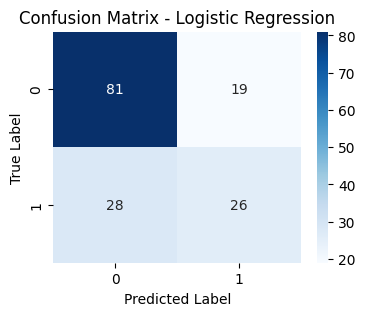

📊 Mô hình: Random Forest
🎯 Độ chính xác (Accuracy): 0.7273
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



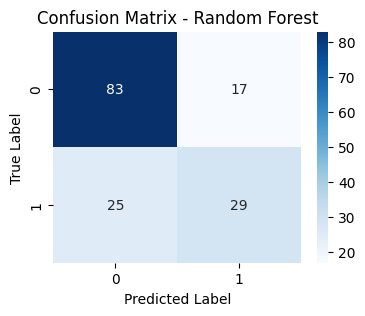

📊 Mô hình: KNN
🎯 Độ chính xác (Accuracy): 0.6753
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       100
           1       0.54      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



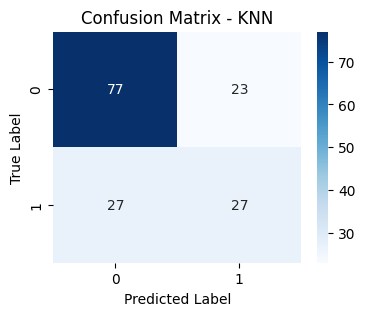

📊 Mô hình: SVM
🎯 Độ chính xác (Accuracy): 0.7208
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154



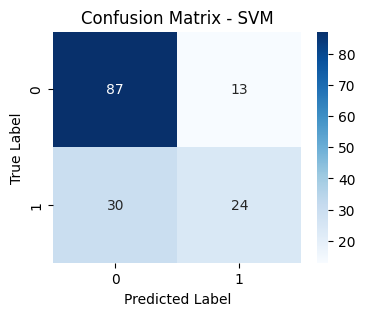

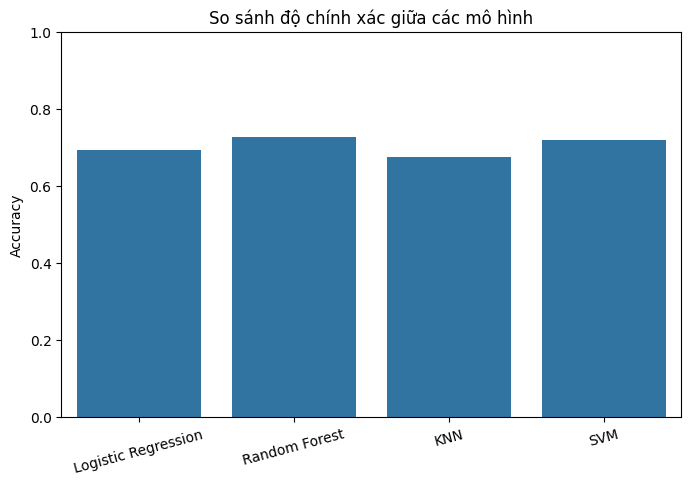

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = {}  # lưu trữ kết quả accuracy từng mô hình

for name, model in models.items():
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính độ chính xác
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    # In báo cáo chi tiết
    print("="*60)
    print(f"📊 Mô hình: {name}")
    print(f"🎯 Độ chính xác (Accuracy): {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Vẽ ma trận nhầm lẫn (Confusion Matrix)
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# So sánh độ chính xác các mô hình
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("So sánh độ chính xác giữa các mô hình")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

📝 Nhận xét:
→ Mô hình tốt nhất là mô hình có Accuracy cao, Recall tốt cho lớp bệnh nhân mắc bệnh (1).
→ Ma trận nhầm lẫn giúp hiểu mô hình có bỏ sót nhiều bệnh nhân thật sự hay không.

## 🏆 SO SÁNH KẾT QUẢ CÁC MÔ HÌNH

C:\Users\ACER\AppData\Local\Temp\ipykernel_19844\2314737258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


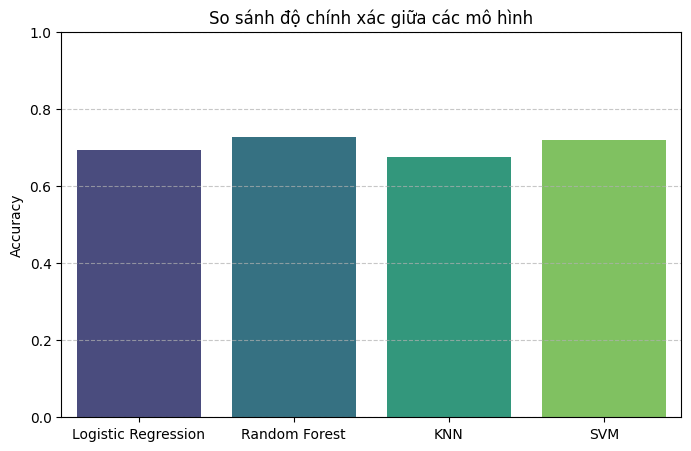

🏆 Mô hình tốt nhất: Random Forest (Accuracy = 0.7273)


In [10]:
# Vẽ biểu đồ so sánh Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("So sánh độ chính xác giữa các mô hình")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Xác định mô hình tốt nhất
best_model_name = max(results, key=results.get)
print(f"🏆 Mô hình tốt nhất: {best_model_name} (Accuracy = {results[best_model_name]:.4f})")

## 💾 LƯU MÔ HÌNH TỐT NHẤT

In [11]:
import joblib

# Lưu mô hình tốt nhất ra file .pkl
best_model = models[best_model_name]
file_name = f"{best_model_name.replace(' ', '_')}_model.pkl"
joblib.dump(best_model, file_name)

print(f"💾 Đã lưu mô hình: {file_name}")

💾 Đã lưu mô hình: Random_Forest_model.pkl



>Kết thúc